In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels import regression
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import coint
import seaborn
import math
%matplotlib inline
from sklearn.decomposition import PCA #For PCA Analysis
import seaborn
import time 
import datetime
import shap

In [2]:
df=pd.read_excel("C:\\Users\\raymond.widjaja\\Desktop\\ETF and Constituents.xlsx","Sheet4")
df

,BarTp,Trade,Unnamed: 2,BarTp.1,Trade.1,Unnamed: 5,BarTp.2,Trade.2,Unnamed: 8,BarTp.3,...,Trade.7,Unnamed: 23,BarTp.8,Trade.8,Unnamed: 26,BarTp.9,Trade.9,Unnamed: 29,BarTp.10,Trade.10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,XLI US Equity,NaN,NaN,XLK US Equity,NaN,NaN,XLV US Equity,NaN,NaN,FXU US Equity,...,NaN,NaN,BIZD US Equity,NaN,NaN,DBB US Equity,NaN,NaN,SHY US Equity,NaN
2,Dates,Close,NaN,Dates,Close,NaN,Dates,Close,NaN,Dates,...,Close,NaN,Dates,Close,NaN,Dates,Close,NaN,Dates,Close
3,2020-04-24 21:30:00,60.89,NaN,2020-04-24 21:30:00,86.66,NaN,2020-04-24 21:30:00,99,NaN,2020-04-24 21:30:00,...,12.75,NaN,2020-04-24 21:30:00,9.74,NaN,2020-04-24 21:30:00,12.41,NaN,2020-04-24 21:30:00,86.6463
4,2020-04-24 22:00:00,60.89,NaN,2020-04-24 22:00:00,87.09,NaN,2020-04-24 22:00:00,99.21,NaN,2020-04-24 22:00:00,...,12.38,NaN,2020-04-24 22:00:00,9.74,NaN,2020-04-24 22:00:00,12.38,NaN,2020-04-24 22:00:00,86.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1916,2020-11-06 03:00:00,81.54,NaN,2020-11-06 03:00:00,121.26,NaN,2020-11-06 03:00:00,110.24,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-06 03:00:00,86.395
1917,2020-11-06 03:30:00,81.615,NaN,2020-11-06 03:30:00,121.42,NaN,2020-11-06 03:30:00,110.29,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-06 03:30:00,86.385
1918,2020-11-06 04:00:00,81.46,NaN,2020-11-06 04:00:00,121.22,NaN,2020-11-06 04:00:00,110.11,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-06 04:00:00,86.3834
1919,2020-11-06 04:30:00,81.26,NaN,2020-11-06 04:30:00,121.29,NaN,2020-11-06 04:30:00,109.88,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-06 04:30:00,86.37


In [4]:
data=df.copy()

In [43]:
df=data.copy()

# Clean data from Blomoberg Intraday Excel Retrieval

In [44]:
df = df.drop([0]) #Drop first row which is a space 
df.index = range(len(df)) #Select the range row for reindex

N = 11 #Total Assets in the list

equity_list = []
for i in range(N):
    equity_list.append(df.iloc[0, i * 3]) #Row 3 of the Book2 file. Append the TICKER name to the list
print(equity_list) #Check if the output is correct and print its length too
print(len(equity_list))

df = df.drop([0, 1]) #drop the name and date row
df.index = range(len(df)) #reindex 
df = df.drop([len(df) - 1])#drop last value
print(df)

date_list = df.iloc[:,0].tolist()#add the benchmark for datelist. 2521 should be gone just [:,0]. But some nan value will create an error so i just set in manually at 2521 the end of the date of asset 1
columns = ['Dates'] + equity_list
#2521 hould be len(df) but because the df of first include some NAN. Means by that there is more date in the other asset. so i fixed it manually as 2521
clean_df = pd.DataFrame(np.arange(len(df) * (N+1)).reshape(len(df), N + 1), index=range(len(df)), columns=columns)
clean_df['Dates'] = date_list
clean_df.index = date_list
# clean_df = df.iloc[:, [0, 1]]
# clean_df.columns = ['Date', equity_list[0]]
for i in range(11):
    print(equity_list[i])
    right = df.iloc[:, [i * 3, i * 3 + 1]] #each asset date and closing price
    right.columns = ['Dates', equity_list[i]] #change the column so its more readable
    right.index = right['Dates'].tolist() #update the index
    value = math.nan
    for date in date_list: #check  first date_list we created if it is in each asset index
        # print(date)
        if date not in right.index: #if its not, update the value to nan
            clean_df.loc[date, equity_list[i]] = value #for the second till end loop, just update with the value before
        else:
            value = right.loc[date, equity_list[i]] #if valid, update the value with the value of the right
            clean_df.loc[date, equity_list[i]] = right.loc[date, equity_list[i]] #


['XLI US Equity', 'XLK US Equity', 'XLV US Equity', 'FXU US Equity', 'XTN US Equity', 'FXN US Equity', 'PSCC US Equity', 'ENFR US Equity', 'BIZD US Equity', 'DBB US Equity', 'SHY US Equity']
11
                    BarTp   Trade  Unnamed: 2              BarTp.1 Trade.1  \
0     2020-04-24 21:30:00   60.89         NaN  2020-04-24 21:30:00   86.66   
1     2020-04-24 22:00:00   60.89         NaN  2020-04-24 22:00:00   87.09   
2     2020-04-24 22:30:00   60.85         NaN  2020-04-24 22:30:00   87.12   
3     2020-04-24 23:00:00   60.73         NaN  2020-04-24 23:00:00   87.11   
4     2020-04-24 23:30:00   60.72         NaN  2020-04-24 23:30:00   87.31   
...                   ...     ...         ...                  ...     ...   
1912  2020-11-06 02:30:00   81.64         NaN  2020-11-06 02:30:00  120.95   
1913  2020-11-06 03:00:00   81.54         NaN  2020-11-06 03:00:00  121.26   
1914  2020-11-06 03:30:00  81.615         NaN  2020-11-06 03:30:00  121.42   
1915  2020-11-06 04:00:00 

In [48]:
final_df=clean_df.drop(['Dates'],axis=1)

### Export final data

In [52]:
#final_df.to_csv("C:\\Users\\raymond.widjaja\\Desktop\\Academia Trading Strategies\\ETF\\clean_ETF.csv")

In [77]:
dt=pd.read_csv("C:\\Users\\raymond.widjaja\\Desktop\\Academia Trading Strategies\\ETF\\clean_ETF.csv")
dt=dt.drop(['Unnamed: 0'],axis=1)
dt

,XLI US Equity,XLK US Equity,XLV US Equity,FXU US Equity,XTN US Equity,FXN US Equity,PSCC US Equity,ENFR US Equity,BIZD US Equity,DBB US Equity,SHY US Equity
0,60.890,86.66,99.000,25.8300,44.3133,5.5050,65.7100,12.7500,9.7400,12.4100,86.6463
1,60.890,87.09,99.210,25.8400,44.2983,5.3800,65.7100,12.3800,9.7400,12.3800,86.6500
2,60.850,87.12,99.230,25.8400,44.4561,5.4120,65.7100,12.5701,9.8400,12.4000,86.6450
3,60.730,87.11,99.080,25.8300,44.2957,5.3400,65.7100,12.3784,9.7101,12.4100,86.6450
4,60.720,87.31,99.162,25.7900,44.4600,5.3358,65.7100,12.4000,9.7800,12.4300,86.6400
...,...,...,...,...,...,...,...,...,...,...,...
1912,81.640,120.95,110.150,28.6007,62.3700,5.8725,79.0991,12.7900,12.1300,16.0100,86.3900
1913,81.540,121.26,110.240,28.5800,62.4000,5.8550,79.0991,12.7800,12.1370,16.0212,86.3950
1914,81.615,121.42,110.290,28.5800,62.4000,5.8350,79.0991,12.7400,12.1250,16.0150,86.3850
1915,81.460,121.22,110.110,28.5200,62.2200,5.8475,79.0991,12.7400,12.1350,16.0050,86.3834


## Split data sets

In [63]:
from sklearn.model_selection import train_test_split,TimeSeriesSplit,GridSearchCV
#Feature selection / dimension reduction
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV,SelectPercentile,mutual_info_classif
#Performance evaluation
from sklearn import metrics

In [81]:
ret=dt.pct_change().dropna() #Calculate the return 
ret

,XLI US Equity,XLK US Equity,XLV US Equity,FXU US Equity,XTN US Equity,FXN US Equity,PSCC US Equity,ENFR US Equity,BIZD US Equity,DBB US Equity,SHY US Equity
1,0.000000,0.004962,0.002121,0.000387,-0.000338,-0.022707,0.0,-0.029020,0.000000,-0.002417,0.000043
2,-0.000657,0.000344,0.000202,0.000000,0.003562,0.005948,0.0,0.015355,0.010267,0.001616,-0.000058
3,-0.001972,-0.000115,-0.001512,-0.000387,-0.003608,-0.013304,0.0,-0.015250,-0.013201,0.000806,0.000000
4,-0.000165,0.002296,0.000828,-0.001549,0.003709,-0.000787,0.0,0.001745,0.007199,0.001612,-0.000058
5,0.000823,0.004238,0.002773,0.001551,-0.001125,-0.007703,0.0,0.000000,-0.004642,0.000402,0.000231
...,...,...,...,...,...,...,...,...,...,...,...
1912,0.000306,0.000662,0.001819,-0.000185,0.000907,-0.001276,0.0,0.000000,0.002065,0.000000,0.000090
1913,-0.001225,0.002563,0.000817,-0.000724,0.000481,-0.002980,0.0,-0.000782,0.000577,0.000700,0.000058
1914,0.000920,0.001319,0.000454,0.000000,0.000000,-0.003416,0.0,-0.003130,-0.000989,-0.000387,-0.000116
1915,-0.001899,-0.001647,-0.001632,-0.002099,-0.002885,0.002142,0.0,0.000000,0.000825,-0.000624,-0.000019


In [143]:
X_train,X_test,y_train,y_test=train_test_split(ret,ret,test_size=0.30, shuffle=False)

## Training Sets

In [214]:
#Correlation Matrix of each ETF return
def corMatrix(data):
    fig,ax=plt.subplots(figsize=(10,6))
    mask = np.triu(np.ones_like(data.corr(), dtype=bool))
    seaborn.heatmap(data.corr(),annot=True,mask=mask)
def scatter(actual,predict):
    with plt.style.context("ggplot"):
        plt.scatter(actual,predict)
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.title("Sccater Plot")
        plt.axhline()
        plt.axvline()

In [201]:
def shiftPred(name,data): #shift predd Data
    dt=data.copy()
    X=dt[name]
    Y=dt.drop([name],axis=1).shift(1)
    tot=pd.concat([X,Y],axis=1)
    tot=tot.dropna()
    return tot

In [212]:
def reg(name,data): #simple regression OLS
    model=sm.OLS(data[name],sm.add_constant(data.drop([name],axis=1)))
    olsres=model.fit()
    print(olsres.summary())
    return olsres #the model

In [213]:
for var in X_train.columns: #predictive correlation matrix or regression OLS result
    dr=shiftPred(var,X_train)
    print(var)
    mod=reg(var,dr)
    pred=mod.predict(x_test)

XLI US Equity
                            OLS Regression Results                            
Dep. Variable:          XLI US Equity   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8402
Date:                Fri, 13 Nov 2020   Prob (F-statistic):              0.590
Time:                        16:01:46   Log-Likelihood:                 5203.3
No. Observations:                1340   AIC:                        -1.038e+04
Df Residuals:                    1329   BIC:                        -1.033e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0002     

strong multicollinearity or other numerical problems.
PSCC US Equity
                            OLS Regression Results                            
Dep. Variable:         PSCC US Equity   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     5.119
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           2.27e-07
Time:                        16:01:47   Log-Likelihood:                 5478.1
No. Observations:                1340   AIC:                        -1.093e+04
Df Residuals:                    1329   BIC:                        -1.088e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [177]:
from statsmodels.regression.rolling import RollingOLS
x1=sm.add_constant(tot.drop(['XTN US Equity'],axis=1))
xnew=sm.add_constant(tot2.drop(['XTN US Equity'],axis=1))
ynew=tot2['XTN US Equity']
y1=tot['XTN US Equity']
model=sm.OLS(y1,x1)
olsres=model.fit()
ypred=olsres.predict(x1)
ynewpred=olsres.predict(xnew)

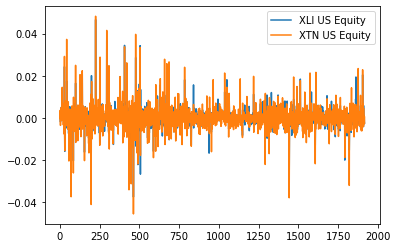

In [215]:
ret[['XLI US Equity','XTN US Equity']].plot()

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
calc_vif(ret)


,variables,VIF
0,XLI US Equity,5.820682
1,XLK US Equity,2.198358
2,XLV US Equity,2.419598
3,FXU US Equity,2.582392
4,XTN US Equity,3.488073
5,FXN US Equity,2.802495
6,PSCC US Equity,1.115789
7,ENFR US Equity,1.843867
8,BIZD US Equity,2.178795
9,DBB US Equity,1.259698


In [194]:
#for name in tot.columns: #tot is shift by 1 lol
    #print(name)
m2=sm.OLS(tot['XTN US Equity'],tot.drop(['XTN US Equity'],axis=1))
m2.fit().summary()
X=X_train.copy()
y=X['XTN US Equity']
x=X.drop(['XTN US Equity'],axis=1).shift(1)
tot=pd.concat([y,x],axis=1)
tot=tot.dropna()
Z=X_test.copy()
yy=Z['XTN US Equity']
xx=Z.drop(['XTN US Equity'],axis=1).shift(1)
tot2=pd.concat([yy,xx],axis=1)
tot2=tot2.dropna()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          XTN US Equity   R-squared (uncentered):                   0.014
Model:                            OLS   Adj. R-squared (uncentered):              0.007
Method:                 Least Squares   F-statistic:                              1.927
Date:                Fri, 13 Nov 2020   Prob (F-statistic):                      0.0379
Time:                        15:07:06   Log-Likelihood:                          4927.4
No. Observations:                1340   AIC:                                     -9835.
Df Residuals:                    1330   BIC:                                     -9783.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
XLI US Equity      0.2366      0.077      3.054      0.002       0.085       0.389
XLK US Equity      0.0253      0.058      0.435      0.663      -0.089       0.139
XLV US Equity     -0.0406      0.082     -0.496      0.620      -0.201       0.120
FXU US Equity     -0.1565      0.062     -2.537      0.011      -0.277      -0.035
FXN US Equity      0.0015      0.030      0.049      0.961      -0.057       0.060
PSCC US Equity    -0.0782      0.044     -1.794      0.073      -0.164       0.007
ENFR US Equity    -0.0632      0.035     -1.812      0.070      -0.132       0.005
BIZD US Equity     0.0005      0.039      0.013      0.990      -0.075       0.076
DBB US Equity      0.0197      0.059      0.334      0.738      -0.096       0.136
SHY US Equity     -0.8200      1.336     -0.614      0.540      -3.441       1.802
==============================================================================
Omnibus:                      372.589   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13972.169
Skew:                           0.565   Prob(JB):                         0.00
Kurtosis:                      18.779   Cond. No.                         109.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [195]:
X_train

,XLI US Equity,XLK US Equity,XLV US Equity,FXU US Equity,XTN US Equity,FXN US Equity,PSCC US Equity,ENFR US Equity,BIZD US Equity,DBB US Equity,SHY US Equity
1,0.000000,0.004962,0.002121,0.000387,-0.000338,-0.022707,0.0,-0.029020,0.000000,-0.002417,0.000043
2,-0.000657,0.000344,0.000202,0.000000,0.003562,0.005948,0.0,0.015355,0.010267,0.001616,-0.000058
3,-0.001972,-0.000115,-0.001512,-0.000387,-0.003608,-0.013304,0.0,-0.015250,-0.013201,0.000806,0.000000
4,-0.000165,0.002296,0.000828,-0.001549,0.003709,-0.000787,0.0,0.001745,0.007199,0.001612,-0.000058
5,0.000823,0.004238,0.002773,0.001551,-0.001125,-0.007703,0.0,0.000000,-0.004642,0.000402,0.000231
...,...,...,...,...,...,...,...,...,...,...,...
1337,0.002317,0.000171,0.002638,0.005191,0.001396,0.006661,0.0,-0.000147,0.004905,0.000652,-0.000116
1338,0.001477,-0.004436,-0.001034,-0.000922,-0.000271,-0.002550,0.0,-0.001799,0.001979,0.000977,0.000058
1339,-0.001859,0.000257,-0.000188,-0.001116,-0.000468,0.000000,0.0,0.000000,0.001654,0.000000,-0.000022
1340,0.002569,0.002741,0.001693,0.001151,0.000000,0.003236,0.0,-0.000750,0.000131,0.000000,-0.000094


XLI US Equity
                                 OLS Regression Results                                
Dep. Variable:          XLI US Equity   R-squared (uncentered):                   0.828
Model:                            OLS   Adj. R-squared (uncentered):              0.827
Method:                 Least Squares   F-statistic:                              918.8
Date:                Tue, 10 Nov 2020   Prob (F-statistic):                        0.00
Time:                        17:13:23   Log-Likelihood:                          9238.3
No. Observations:                1916   AIC:                                 -1.846e+04
Df Residuals:                    1906   BIC:                                 -1.840e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
DBB US Equity
                                 OLS Regression Results                                
Dep. Variable:          DBB US Equity   R-squared (uncentered):                   0.206
Model:                            OLS   Adj. R-squared (uncentered):              0.202
Method:                 Least Squares   F-statistic:                              49.50
Date:                Tue, 10 Nov 2020   Prob (F-statistic):                    1.78e-88
Time:                        17:13:23   Log-Likelihood:                          8532.4
No. Observations:                1916   AIC:                                 -1.704e+04
Df Residuals:                    1906   BIC:                                 -1.699e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
              

In [99]:
shap.initjs()

In [101]:
def print_accuracy(f):
    print("Root mean squared test error = {0}".format(np.sqrt(np.mean((f(X_test) - y_test)**2))))
    time.sleep(0.5) # to let the print get out before any progress bars

XLI US Equity


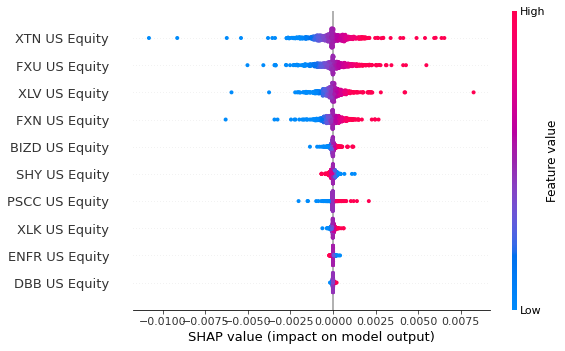

XLK US Equity


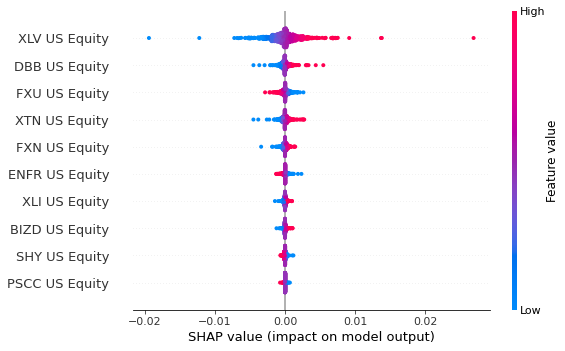

XLV US Equity


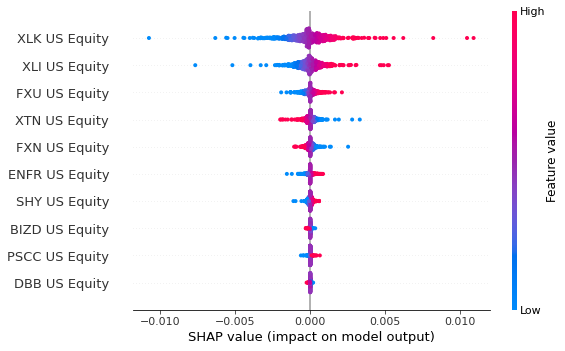

FXU US Equity


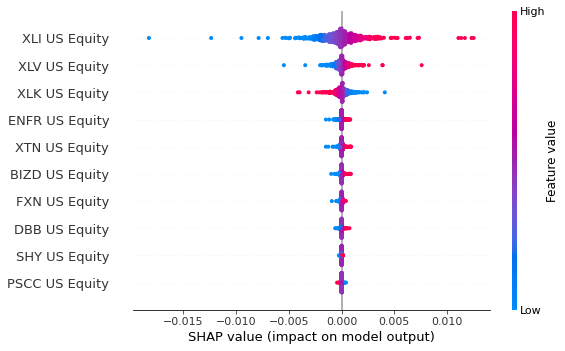

XTN US Equity


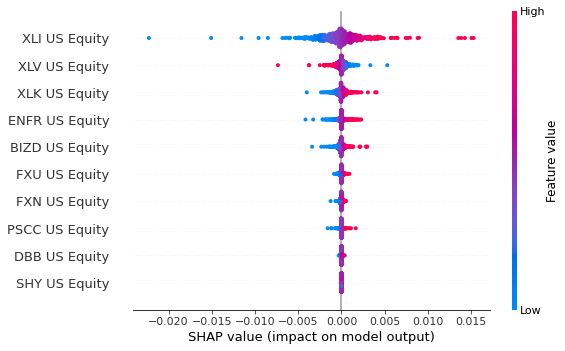

FXN US Equity


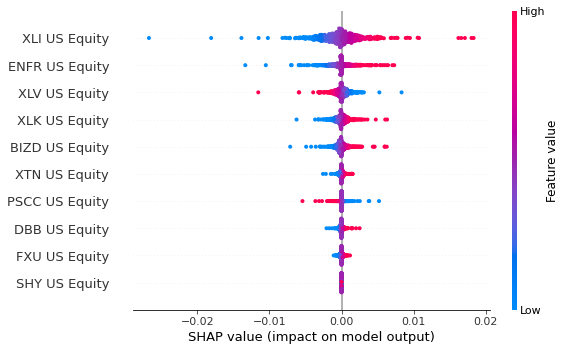

PSCC US Equity


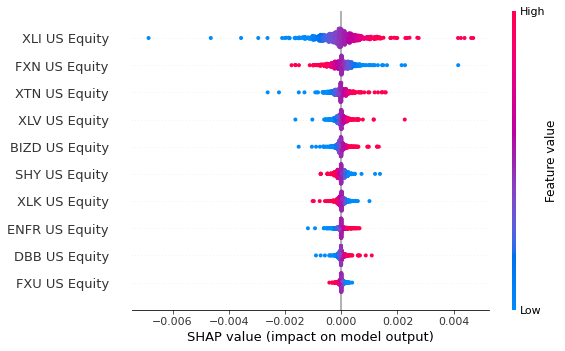

ENFR US Equity


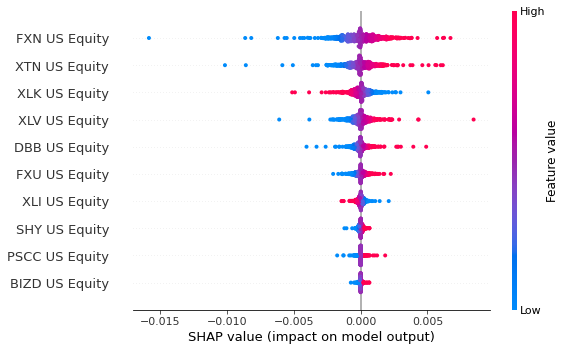

BIZD US Equity


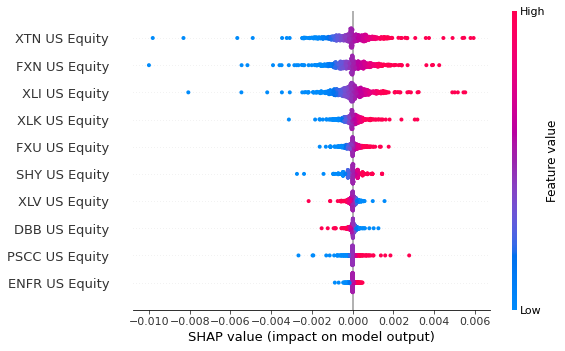

DBB US Equity


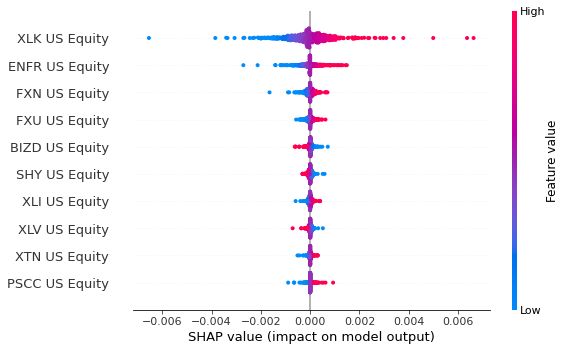

SHY US Equity


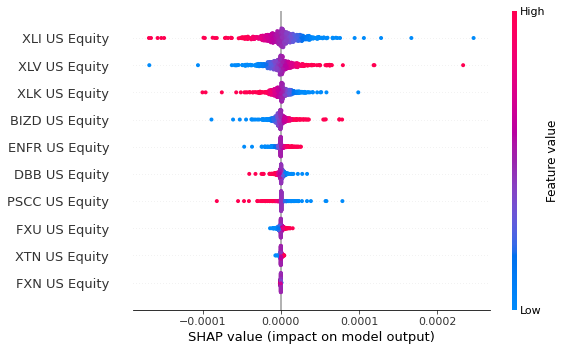

In [107]:
from sklearn import linear_model

for column in ret:
    X_train_summary = shap.kmeans(X_train.drop([column],axis=1), 10)
    print(column)
    lin_regr = linear_model.LinearRegression()
    lin_regr.fit(X_train.drop([column],axis=1),X_train[column])
    ex = shap.KernelExplainer(lin_regr.predict, X_train_summary)
    shap_values = ex.shap_values(X_test.drop([column],axis=1).iloc[0,:])
    shap.force_plot(ex.expected_value, shap_values, X_test.drop([column],axis=1).iloc[0,:])
    shap_values = ex.shap_values(X_test.drop([column],axis=1))
    shap.summary_plot(shap_values, X_test.drop([column],axis=1))

In [130]:
X_trainP=X_train.copy()
X_testP=X_test.copy()
X_trainP['XLI US Equity']=X_tranin['XLI US Equity'].shift(1)
X_trainP=X_trainP.dropna()

XLI US Equity


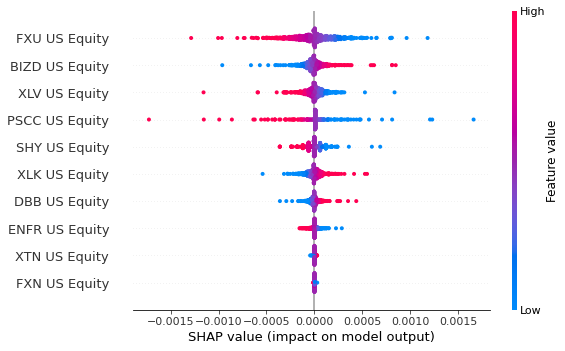

XLK US Equity


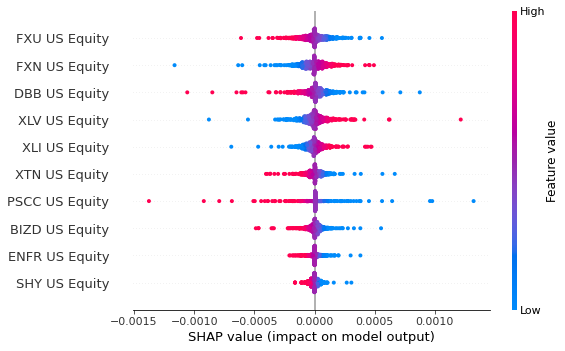

XLV US Equity


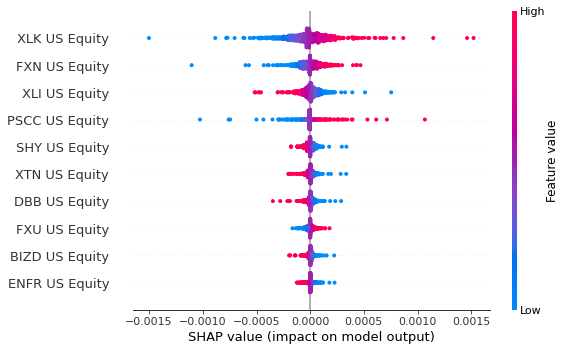

FXU US Equity


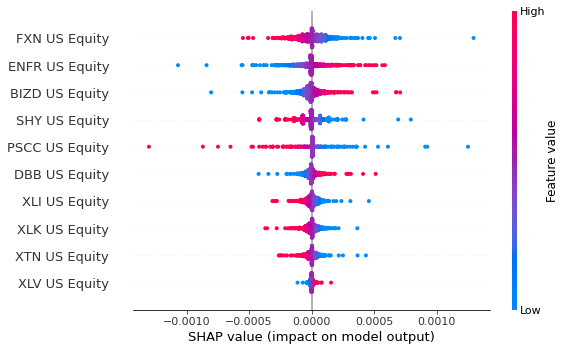

XTN US Equity


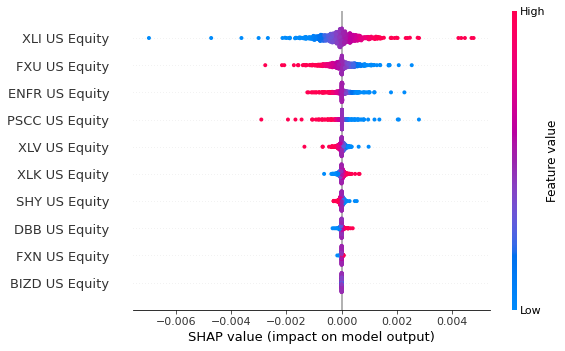

FXN US Equity


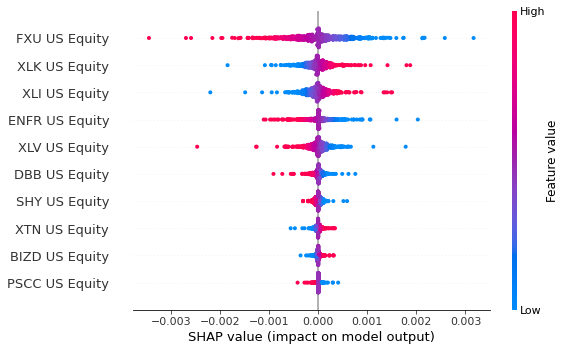

PSCC US Equity


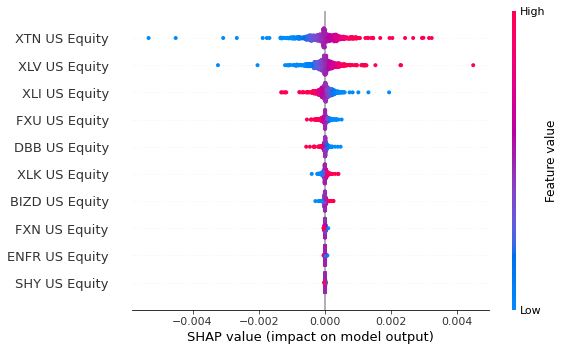

ENFR US Equity


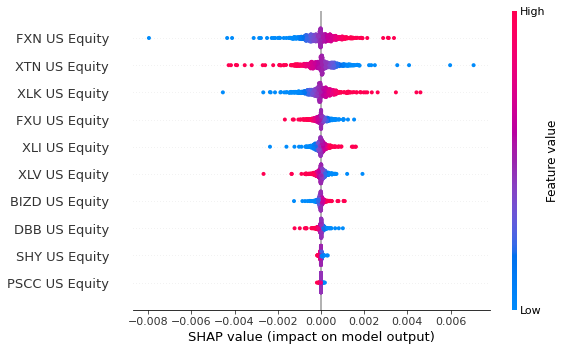

BIZD US Equity


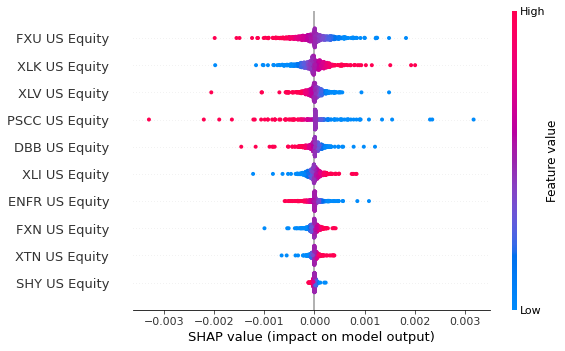

DBB US Equity


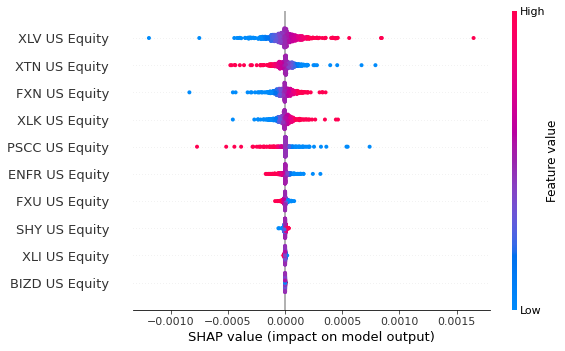

SHY US Equity


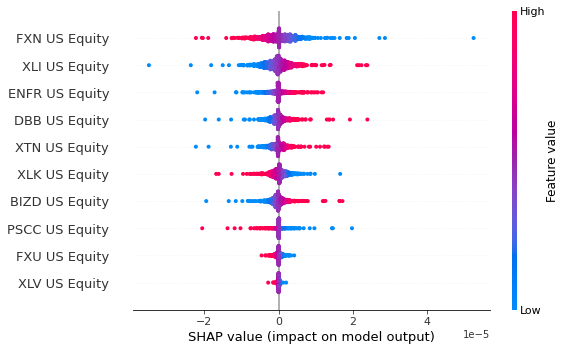

In [145]:
for column in ret:
    X_trainP=X_train.copy()
    X_testP=X_test.copy()
    y=X_trainP[column]
    x=X_trainP.drop([column],axis=1).shift(1)
    X_trainP=pd.concat([y,x],axis=1)
    X_trainP=X_trainP.dropna()
    y=X_testP[column]
    x=X_testP.drop([column],axis=1).shift(1)
    X_testP=pd.concat([y,x],axis=1)
    X_testP=X_testP.dropna()
    X_train_summary = shap.kmeans(X_trainP.drop([column],axis=1), 10)
    print(column)
    lin_regr = linear_model.LinearRegression()
    lin_regr.fit(X_trainP.drop([column],axis=1),X_trainP[column])
    ex = shap.KernelExplainer(lin_regr.predict, X_train_summary)
    shap_values = ex.shap_values(X_testP.drop([column],axis=1).iloc[0,:])
    shap.force_plot(ex.expected_value, shap_values, X_testP.drop([column],axis=1).iloc[0,:])
    shap_values = ex.shap_values(X_testP.drop([column],axis=1))
    shap.summary_plot(shap_values, X_testP.drop([column],axis=1))

,XLI US Equity,XLK US Equity,XLV US Equity,FXU US Equity,XTN US Equity,FXN US Equity,PSCC US Equity,ENFR US Equity,BIZD US Equity,DBB US Equity,SHY US Equity
1,0.000000,0.004962,0.002121,0.000387,-0.000338,-0.022707,0.0,-0.029020,0.000000,-0.002417,0.000043
2,-0.000657,0.000344,0.000202,0.000000,0.003562,0.005948,0.0,0.015355,0.010267,0.001616,-0.000058
3,-0.001972,-0.000115,-0.001512,-0.000387,-0.003608,-0.013304,0.0,-0.015250,-0.013201,0.000806,0.000000
4,-0.000165,0.002296,0.000828,-0.001549,0.003709,-0.000787,0.0,0.001745,0.007199,0.001612,-0.000058
5,0.000823,0.004238,0.002773,0.001551,-0.001125,-0.007703,0.0,0.000000,-0.004642,0.000402,0.000231
...,...,...,...,...,...,...,...,...,...,...,...
1337,0.002317,0.000171,0.002638,0.005191,0.001396,0.006661,0.0,-0.000147,0.004905,0.000652,-0.000116
1338,0.001477,-0.004436,-0.001034,-0.000922,-0.000271,-0.002550,0.0,-0.001799,0.001979,0.000977,0.000058
1339,-0.001859,0.000257,-0.000188,-0.001116,-0.000468,0.000000,0.0,0.000000,0.001654,0.000000,-0.000022
1340,0.002569,0.002741,0.001693,0.001151,0.000000,0.003236,0.0,-0.000750,0.000131,0.000000,-0.000094


### XLI and XTN Overlapping Arb

In [115]:
dt2=pd.read_csv("C:\\Users\\raymond.widjaja\\Desktop\\Academia Trading Strategies\\ETF\\clean_etf_XLIXTNoverlap.csv")
dt2=dt2.drop(['Unnamed: 0'],axis=1)
dt2


,XLI US Equity,XLK US Equity,XLV US Equity,FXU US Equity,XTN US Equity,FXN US Equity,PSCC US Equity,ENFR US Equity,BIZD US Equity,DBB US Equity,...,LUV US Equity,DAL US Equity,ODFL US Equity,KSU US Equity,EXPD US Equity,CHRW US Equity,JBHT US Equity,UAL US Equity,AAL US Equity,ALK US Equity
0,60.890,86.66,99.000,25.8300,44.3133,5.5050,65.7100,12.7500,9.7400,12.4100,...,29.6300,22.3250,138.545,127.090,70.110,70.80,100.380,25.6800,10.2386,28.2150
1,60.890,87.09,99.210,25.8400,44.2983,5.3800,65.7100,12.3800,9.7400,12.3800,...,29.2500,22.0600,138.960,128.835,70.320,70.87,101.090,25.1200,10.1600,27.7300
2,60.850,87.12,99.230,25.8400,44.4561,5.4120,65.7100,12.5701,9.8400,12.4000,...,29.3000,22.1500,139.000,129.100,70.480,70.70,101.400,25.0850,10.1470,27.7750
3,60.730,87.11,99.080,25.8300,44.2957,5.3400,65.7100,12.3784,9.7101,12.4100,...,29.1050,22.1100,138.810,129.380,70.920,71.25,101.230,24.9517,10.0750,27.5200
4,60.720,87.31,99.162,25.7900,44.4600,5.3358,65.7100,12.4000,9.7800,12.4300,...,28.9795,21.9100,138.785,129.740,70.945,71.25,101.100,24.9100,10.0050,27.5250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,81.640,120.95,110.150,28.6007,62.3700,5.8725,79.0991,12.7900,12.1300,16.0100,...,40.9850,32.1900,206.090,184.720,87.525,89.08,126.605,35.2350,11.5800,39.3805
1913,81.540,121.26,110.240,28.5800,62.4000,5.8550,79.0991,12.7800,12.1370,16.0212,...,40.9150,32.0100,205.810,184.780,87.380,89.36,126.800,35.0250,11.5124,39.1800
1914,81.615,121.42,110.290,28.5800,62.4000,5.8350,79.0991,12.7400,12.1250,16.0150,...,41.0310,32.0000,206.200,184.980,87.270,89.26,126.630,35.1800,11.5450,39.2174
1915,81.460,121.22,110.110,28.5200,62.2200,5.8475,79.0991,12.7400,12.1350,16.0050,...,41.0100,31.9831,206.190,184.410,87.160,89.03,126.690,35.3050,11.5801,39.2050


In [116]:
ret2=dt2.pct_change().dropna()
ret2

,XLI US Equity,XLK US Equity,XLV US Equity,FXU US Equity,XTN US Equity,FXN US Equity,PSCC US Equity,ENFR US Equity,BIZD US Equity,DBB US Equity,...,LUV US Equity,DAL US Equity,ODFL US Equity,KSU US Equity,EXPD US Equity,CHRW US Equity,JBHT US Equity,UAL US Equity,AAL US Equity,ALK US Equity
1,0.000000,0.004962,0.002121,0.000387,-0.000338,-0.022707,0.0,-0.029020,0.000000,-0.002417,...,-0.012825,-0.011870,0.002995,0.013730,0.002995,0.000989,0.007073,-0.021807,-0.007677,-0.017189
2,-0.000657,0.000344,0.000202,0.000000,0.003562,0.005948,0.0,0.015355,0.010267,0.001616,...,0.001709,0.004080,0.000288,0.002057,0.002275,-0.002399,0.003067,-0.001393,-0.001280,0.001623
3,-0.001972,-0.000115,-0.001512,-0.000387,-0.003608,-0.013304,0.0,-0.015250,-0.013201,0.000806,...,-0.006655,-0.001806,-0.001367,0.002169,0.006243,0.007779,-0.001677,-0.005314,-0.007096,-0.009181
4,-0.000165,0.002296,0.000828,-0.001549,0.003709,-0.000787,0.0,0.001745,0.007199,0.001612,...,-0.004312,-0.009046,-0.000180,0.002783,0.000353,0.000000,-0.001284,-0.001671,-0.006948,0.000182
5,0.000823,0.004238,0.002773,0.001551,-0.001125,-0.007703,0.0,0.000000,-0.004642,0.000402,...,0.002785,-0.001296,0.007393,0.006937,0.000987,-0.000421,0.001385,-0.000201,-0.002999,-0.004807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,0.000306,0.000662,0.001819,-0.000185,0.000907,-0.001276,0.0,0.000000,0.002065,0.000000,...,0.008862,0.010675,-0.001937,0.001030,0.004418,0.001687,-0.000592,0.009888,0.012680,0.007432
1913,-0.001225,0.002563,0.000817,-0.000724,0.000481,-0.002980,0.0,-0.000782,0.000577,0.000700,...,-0.001708,-0.005592,-0.001359,0.000325,-0.001657,0.003143,0.001540,-0.005960,-0.005838,-0.005091
1914,0.000920,0.001319,0.000454,0.000000,0.000000,-0.003416,0.0,-0.003130,-0.000989,-0.000387,...,0.002835,-0.000312,0.001895,0.001082,-0.001259,-0.001119,-0.001341,0.004425,0.002832,0.000955
1915,-0.001899,-0.001647,-0.001632,-0.002099,-0.002885,0.002142,0.0,0.000000,0.000825,-0.000624,...,-0.000512,-0.000528,-0.000048,-0.003081,-0.001260,-0.002577,0.000474,0.003553,0.003040,-0.000316


In [118]:
X_train2,X_test2,y_train2,y_test2=train_test_split(ret2,ret2,test_size=0.30, shuffle=False)

In [126]:
list2=equity_list.copy()
list2.remove('XLI US Equity')
list2.remove('XTN US Equity')
list2

['XLK US Equity',
 'XLV US Equity',
 'FXU US Equity',
 'FXN US Equity',
 'PSCC US Equity',
 'ENFR US Equity',
 'BIZD US Equity',
 'DBB US Equity',
 'SHY US Equity']

,XLI US Equity,XLK US Equity,XLV US Equity,FXU US Equity,XTN US Equity,FXN US Equity,PSCC US Equity,ENFR US Equity,BIZD US Equity,DBB US Equity,...,LUV US Equity,DAL US Equity,ODFL US Equity,KSU US Equity,EXPD US Equity,CHRW US Equity,JBHT US Equity,UAL US Equity,AAL US Equity,ALK US Equity
1,0.000000,0.004962,0.002121,0.000387,-0.000338,-0.022707,0.0,-0.029020,0.000000,-0.002417,...,-0.012825,-0.011870,0.002995,0.013730,0.002995,0.000989,0.007073,-0.021807,-0.007677,-0.017189
2,-0.000657,0.000344,0.000202,0.000000,0.003562,0.005948,0.0,0.015355,0.010267,0.001616,...,0.001709,0.004080,0.000288,0.002057,0.002275,-0.002399,0.003067,-0.001393,-0.001280,0.001623
3,-0.001972,-0.000115,-0.001512,-0.000387,-0.003608,-0.013304,0.0,-0.015250,-0.013201,0.000806,...,-0.006655,-0.001806,-0.001367,0.002169,0.006243,0.007779,-0.001677,-0.005314,-0.007096,-0.009181
4,-0.000165,0.002296,0.000828,-0.001549,0.003709,-0.000787,0.0,0.001745,0.007199,0.001612,...,-0.004312,-0.009046,-0.000180,0.002783,0.000353,0.000000,-0.001284,-0.001671,-0.006948,0.000182
5,0.000823,0.004238,0.002773,0.001551,-0.001125,-0.007703,0.0,0.000000,-0.004642,0.000402,...,0.002785,-0.001296,0.007393,0.006937,0.000987,-0.000421,0.001385,-0.000201,-0.002999,-0.004807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,0.002317,0.000171,0.002638,0.005191,0.001396,0.006661,0.0,-0.000147,0.004905,0.000652,...,0.006792,0.002964,-0.000398,-0.001711,-0.000334,-0.003370,-0.002804,0.006552,0.005805,0.009779
1338,0.001477,-0.004436,-0.001034,-0.000922,-0.000271,-0.002550,0.0,-0.001799,0.001979,0.000977,...,0.001018,-0.000786,-0.002138,0.001606,0.001448,0.002624,-0.001334,0.001385,0.002509,0.004470
1339,-0.001859,0.000257,-0.000188,-0.001116,-0.000468,0.000000,0.0,0.000000,0.001654,0.000000,...,0.004196,0.001416,-0.003487,-0.001176,-0.000111,-0.001007,-0.001300,-0.003320,0.005557,0.003941
1340,0.002569,0.002741,0.001693,0.001151,0.000000,0.003236,0.0,-0.000750,0.000131,0.000000,...,0.002912,0.006441,0.000750,0.002462,0.001112,0.002318,0.002024,0.008021,0.010687,0.005678


In [1]:
#Correlation Matrix
fig,ax=plt.subplots(figsize=(10,6))
mask = np.triu(np.ones_like(X_train2.drop(list2,axis=1).corr(), dtype=bool))
seaborn.heatmap(X_train2.drop(list2,axis=1).corr(),annot=True,mask=mask)

NameError: name 'plt' is not defined